In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
# Hospital Adm
df_hospital_adm = pd.read_csv("../data/df_b_horizonte_day_GRIPE.csv")
# Weather
df_weather = pd.read_csv("../data/days_weather_pampulha.csv")
# Air Q.
df_air_qual = pd.read_csv("../data/b_horizonte_pivot_amazonas.csv")

# Name for final dataset (save)
final_dataset_name='df_final_bh_amazonas_GRIPE.csv'

In [3]:
df_hospital_adm.rename(columns={"DT_INTER": 'Date'}, inplace=True)

In [4]:
df_hospital_adm['Date'] = pd.to_datetime(df_hospital_adm['Date'], format='%Y%m%d')
df_hospital_adm.head()

,Date,NUMBER_INT
0,2012-01-01,16
1,2012-01-02,15
2,2012-01-03,20
3,2012-01-04,28
4,2012-01-05,19


In [5]:
df_hospital_adm.isnull().sum()

Date          0
NUMBER_INT    0
dtype: int64

In [6]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_weather.head()

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min
0,2015-01-01,Thu,3,1,1,0,1,33.9,20.6,25.912500,89.0,32.0
1,2015-01-02,Fri,4,1,1,0,0,32.9,21.0,26.050000,87.0,38.0
2,2015-01-03,Sat,5,1,1,1,0,33.5,20.2,26.683333,83.0,38.0
3,2015-01-04,Sun,6,1,1,1,0,30.6,22.2,25.641667,81.0,43.0
4,2015-01-05,Mon,0,2,1,0,0,30.8,20.8,25.520833,79.0,36.0


In [7]:
df_weather_hospital_adm = pd.merge(df_weather, df_hospital_adm, on='Date', how='left')

In [8]:
df_weather_hospital_adm.head(20)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT
0,2015-01-01,Thu,3,1,1,0,1,33.9,20.6,25.912500,89.0,32.0,20
1,2015-01-02,Fri,4,1,1,0,0,32.9,21.0,26.050000,87.0,38.0,17
2,2015-01-03,Sat,5,1,1,1,0,33.5,20.2,26.683333,83.0,38.0,11
3,2015-01-04,Sun,6,1,1,1,0,30.6,22.2,25.641667,81.0,43.0,9
4,2015-01-05,Mon,0,2,1,0,0,30.8,20.8,25.520833,79.0,36.0,19
5,2015-01-06,Tue,1,2,1,0,0,29.5,20.5,25.016667,79.0,41.0,12
6,2015-01-07,Wed,2,2,1,0,0,28.0,19.9,23.925000,78.0,44.0,15
7,2015-01-08,Thu,3,2,1,0,0,30.4,19.7,24.229167,74.0,30.0,16
8,2015-01-09,Fri,4,2,1,0,0,30.5,19.6,24.579167,68.0,28.0,9
9,2015-01-10,Sat,5,2,1,1,0,32.6,20.6,25.887500,73.0,33.0,7


In [9]:
df_weather_hospital_adm.describe()

,Date,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,2017-07-01 12:00:00,3.000548,26.615553,6.523549,0.285871,0.024644,28.314513,17.791347,22.276965,82.264513,40.261227,17.484118
min,2015-01-01 00:00:00,0.000000,1.000000,1.000000,0.000000,0.000000,17.800000,7.300000,13.625000,42.000000,10.000000,2.000000
25%,2016-04-01 06:00:00,1.000000,14.000000,4.000000,0.000000,0.000000,26.300000,16.100000,20.464583,77.000000,32.000000,13.000000
50%,2017-07-01 12:00:00,3.000000,27.000000,7.000000,0.000000,0.000000,28.500000,18.400000,22.343750,84.000000,39.000000,17.000000
75%,2018-09-30 18:00:00,5.000000,40.000000,10.000000,1.000000,0.000000,30.475000,19.700000,24.061458,90.000000,48.000000,22.000000
max,2019-12-31 00:00:00,6.000000,53.000000,12.000000,1.000000,1.000000,37.700000,24.100000,29.645833,94.000000,91.000000,41.000000
std,NaN,2.000959,15.065085,3.449478,0.451952,0.155080,3.044044,2.625865,2.507432,9.226503,12.646520,6.461691


In [10]:
df_weather_hospital_adm.isnull().sum()

Date            0
DayOfWeek       0
DayOfWeekNum    0
WeekOfYear      0
Month           0
IsWeekend       0
IsHoliday       0
temp_max        0
temp_min        0
temp_mean       0
humidity_max    0
humidity_min    0
NUMBER_INT      0
dtype: int64

In [11]:
# Days with no hospital admi
df_weather_hospital_adm['NUMBER_INT'] = df_weather_hospital_adm['NUMBER_INT'].fillna(0.0)

In [12]:
df_weather_hospital_adm.isnull().sum()

Date            0
DayOfWeek       0
DayOfWeekNum    0
WeekOfYear      0
Month           0
IsWeekend       0
IsHoliday       0
temp_max        0
temp_min        0
temp_mean       0
humidity_max    0
humidity_min    0
NUMBER_INT      0
dtype: int64

In [13]:
df_weather_hospital_adm.tail()

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT
1821,2019-12-27,Fri,4,52,12,0,0,29.1,19.9,24.016667,83.0,40.0,21
1822,2019-12-28,Sat,5,52,12,1,0,28.6,19.7,23.245833,88.0,44.0,20
1823,2019-12-29,Sun,6,52,12,1,0,29.4,18.8,22.333333,90.0,40.0,19
1824,2019-12-30,Mon,0,1,12,0,0,29.3,18.1,22.958333,84.0,32.0,15
1825,2019-12-31,Tue,1,1,12,0,0,29.9,18.8,24.045833,79.0,37.0,18


In [14]:
df_air_qual.head()

,Data,CO,MP10,O3,MP2.5,SO2
0,01/01/2015,0.0,NaN,68.0,NaN,82.0
1,01/01/2016,1.0,26.0,NaN,32.0,6.0
2,01/01/2018,0.0,NaN,39.0,NaN,10.0
3,01/01/2019,1.0,10.0,NaN,NaN,16.0
4,01/01/2020,0.0,NaN,NaN,6.0,NaN


In [15]:
# df_air_qual['Data'] = pd.to_datetime(df_air_qual['Data'], format='%d/%m/%Y').dt.strftime('%Y%m%d').astype(int)
df_air_qual['Data'] = pd.to_datetime(df_air_qual['Data'], format='%d/%m/%Y')

df_air_qual.head(20)

,Data,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,0.0,NaN,68.0,NaN,82.0
1,2016-01-01,1.0,26.0,NaN,32.0,6.0
2,2018-01-01,0.0,NaN,39.0,NaN,10.0
3,2019-01-01,1.0,10.0,NaN,NaN,16.0
4,2020-01-01,0.0,NaN,NaN,6.0,NaN
5,2021-01-01,0.0,11.0,NaN,11.0,NaN
6,2015-02-01,0.0,22.0,NaN,NaN,NaN
7,2016-02-01,0.0,14.0,80.0,6.0,10.0
8,2017-02-01,0.0,14.0,47.0,4.0,NaN
9,2018-02-01,NaN,NaN,27.0,7.0,10.0


In [16]:
df_air_qual.rename(columns={'Data': 'Date'}, inplace= True)

In [17]:
df_weather_hospital_adm_air_qual = pd.merge(df_weather_hospital_adm, df_air_qual, on='Date', how='left')


In [18]:
df_weather_hospital_adm_air_qual.head(20)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,Thu,3,1,1,0,1,33.9,20.6,25.912500,89.0,32.0,20,0.0,NaN,68.0,NaN,82.0
1,2015-01-02,Fri,4,1,1,0,0,32.9,21.0,26.050000,87.0,38.0,17,0.0,NaN,79.0,NaN,83.0
2,2015-01-03,Sat,5,1,1,1,0,33.5,20.2,26.683333,83.0,38.0,11,0.0,NaN,44.0,NaN,83.0
3,2015-01-04,Sun,6,1,1,1,0,30.6,22.2,25.641667,81.0,43.0,9,0.0,NaN,49.0,NaN,82.0
4,2015-01-05,Mon,0,2,1,0,0,30.8,20.8,25.520833,79.0,36.0,19,0.0,NaN,59.0,NaN,82.0
5,2015-01-06,Tue,1,2,1,0,0,29.5,20.5,25.016667,79.0,41.0,12,0.0,NaN,54.0,NaN,82.0
6,2015-01-07,Wed,2,2,1,0,0,28.0,19.9,23.925000,78.0,44.0,15,0.0,NaN,54.0,NaN,82.0
7,2015-01-08,Thu,3,2,1,0,0,30.4,19.7,24.229167,74.0,30.0,16,NaN,NaN,66.0,NaN,82.0
8,2015-01-09,Fri,4,2,1,0,0,30.5,19.6,24.579167,68.0,28.0,9,NaN,NaN,61.0,NaN,82.0
9,2015-01-10,Sat,5,2,1,1,0,32.6,20.6,25.887500,73.0,33.0,7,NaN,NaN,51.0,NaN,82.0


In [19]:
df_weather_hospital_adm_air_qual.tail()

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
1821,2019-12-27,Fri,4,52,12,0,0,29.1,19.9,24.016667,83.0,40.0,21,NaN,9.0,NaN,6.0,NaN
1822,2019-12-28,Sat,5,52,12,1,0,28.6,19.7,23.245833,88.0,44.0,20,NaN,10.0,NaN,6.0,NaN
1823,2019-12-29,Sun,6,52,12,1,0,29.4,18.8,22.333333,90.0,40.0,19,NaN,8.0,NaN,5.0,NaN
1824,2019-12-30,Mon,0,1,12,0,0,29.3,18.1,22.958333,84.0,32.0,15,NaN,8.0,NaN,5.0,NaN
1825,2019-12-31,Tue,1,1,12,0,0,29.9,18.8,24.045833,79.0,37.0,18,NaN,8.0,NaN,5.0,NaN


## export final dataset

In [20]:
df_weather_hospital_adm_air_qual.to_csv(final_dataset_name, index=False)

## Stats

In [21]:
df_weather_hospital_adm_air_qual.dtypes

Date            datetime64[ns]
DayOfWeek               object
DayOfWeekNum             int64
WeekOfYear               int64
Month                    int64
IsWeekend                int64
IsHoliday                int64
temp_max               float64
temp_min               float64
temp_mean              float64
humidity_max           float64
humidity_min           float64
NUMBER_INT               int64
CO                     float64
MP10                   float64
O3                     float64
MP2.5                  float64
SO2                    float64
dtype: object

In [22]:
df_weather_hospital_adm_air_qual.count()

Date            1826
DayOfWeek       1826
DayOfWeekNum    1826
WeekOfYear      1826
Month           1826
IsWeekend       1826
IsHoliday       1826
temp_max        1826
temp_min        1826
temp_mean       1826
humidity_max    1826
humidity_min    1826
NUMBER_INT      1826
CO              1581
MP10            1457
O3              1265
MP2.5           1195
SO2             1091
dtype: int64

In [23]:
df_weather_hospital_adm_air_qual.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1826,2017-07-01 12:00:00,2015-01-01 00:00:00,2016-04-01 06:00:00,2017-07-01 12:00:00,2018-09-30 18:00:00,2019-12-31 00:00:00,NaN
DayOfWeekNum,1826.0,3.000548,0.0,1.0,3.0,5.0,6.0,2.000959
WeekOfYear,1826.0,26.615553,1.0,14.0,27.0,40.0,53.0,15.065085
Month,1826.0,6.523549,1.0,4.0,7.0,10.0,12.0,3.449478
IsWeekend,1826.0,0.285871,0.0,0.0,0.0,1.0,1.0,0.451952
IsHoliday,1826.0,0.024644,0.0,0.0,0.0,0.0,1.0,0.15508
temp_max,1826.0,28.314513,17.8,26.3,28.5,30.475,37.7,3.044044
temp_min,1826.0,17.791347,7.3,16.1,18.4,19.7,24.1,2.625865
temp_mean,1826.0,22.276965,13.625,20.464583,22.34375,24.061458,29.645833,2.507432
humidity_max,1826.0,82.264513,42.0,77.0,84.0,90.0,94.0,9.226503


In [24]:
df_weather_hospital_adm_air_qual.describe()

,Date,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1581.000000,1457.000000,1265.000000,1195.000000,1091.000000
mean,2017-07-01 12:00:00,3.000548,26.615553,6.523549,0.285871,0.024644,28.314513,17.791347,22.276965,82.264513,40.261227,17.484118,0.372549,19.908717,52.441107,14.633473,18.745188
min,2015-01-01 00:00:00,0.000000,1.000000,1.000000,0.000000,0.000000,17.800000,7.300000,13.625000,42.000000,10.000000,2.000000,0.000000,4.000000,14.000000,2.000000,0.000000
25%,2016-04-01 06:00:00,1.000000,14.000000,4.000000,0.000000,0.000000,26.300000,16.100000,20.464583,77.000000,32.000000,13.000000,0.000000,13.000000,41.000000,6.000000,8.000000
50%,2017-07-01 12:00:00,3.000000,27.000000,7.000000,0.000000,0.000000,28.500000,18.400000,22.343750,84.000000,39.000000,17.000000,0.000000,18.000000,50.000000,9.000000,12.000000
75%,2018-09-30 18:00:00,5.000000,40.000000,10.000000,1.000000,0.000000,30.475000,19.700000,24.061458,90.000000,48.000000,22.000000,1.000000,24.000000,62.000000,12.000000,24.000000
max,2019-12-31 00:00:00,6.000000,53.000000,12.000000,1.000000,1.000000,37.700000,24.100000,29.645833,94.000000,91.000000,41.000000,2.000000,65.000000,176.000000,86.000000,83.000000
std,NaN,2.000959,15.065085,3.449478,0.451952,0.155080,3.044044,2.625865,2.507432,9.226503,12.646520,6.461691,0.486247,10.049495,17.080363,14.163010,17.178853


In [25]:
df_weather_hospital_adm_air_qual.isnull().sum()


Date              0
DayOfWeek         0
DayOfWeekNum      0
WeekOfYear        0
Month             0
IsWeekend         0
IsHoliday         0
temp_max          0
temp_min          0
temp_mean         0
humidity_max      0
humidity_min      0
NUMBER_INT        0
CO              245
MP10            369
O3              561
MP2.5           631
SO2             735
dtype: int64

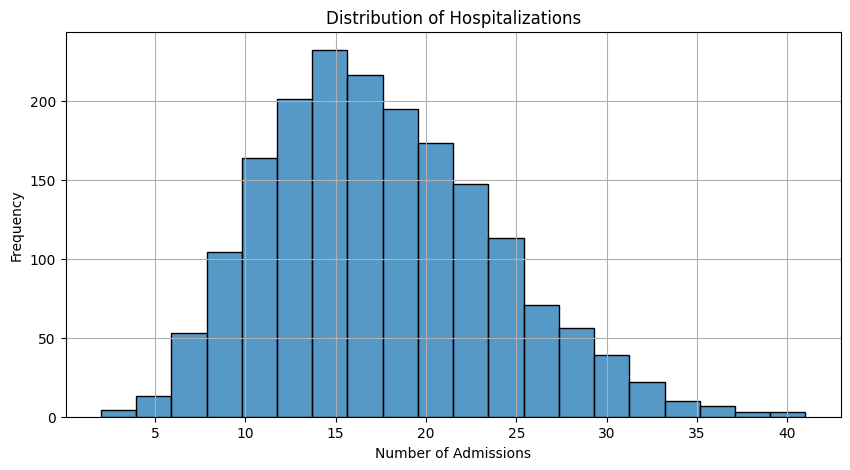

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df_weather_hospital_adm_air_qual['NUMBER_INT'], bins=20)
plt.title('Distribution of Hospitalizations')
plt.xlabel('Number of Admissions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

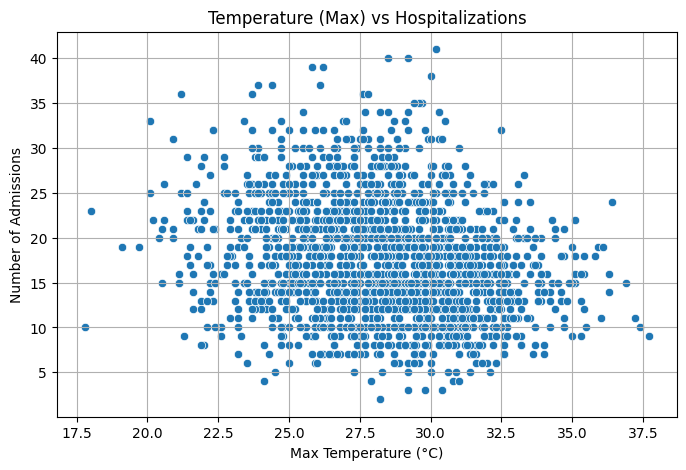

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp_max', y='NUMBER_INT', data=df_weather_hospital_adm_air_qual)
plt.title('Temperature (Max) vs Hospitalizations')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()


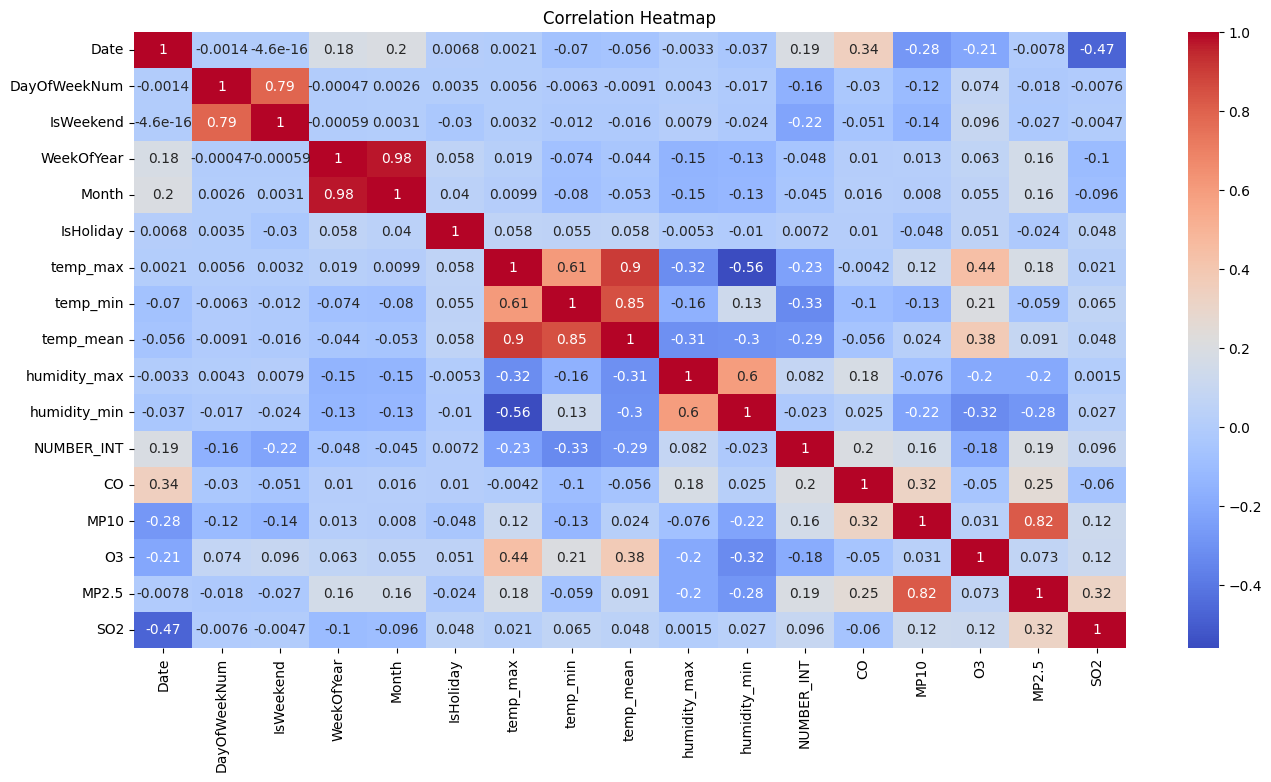

In [28]:
selected_columns = [
    'Date', 'DayOfWeekNum', 'IsWeekend',
    'WeekOfYear', 'Month', 'IsHoliday',
    'temp_max', 'temp_min', 'temp_mean',
    'humidity_max', 'humidity_min', 'NUMBER_INT', 
    'CO', 'MP10', 'O3', 'MP2.5', 'SO2'
]



df_selected_num = df_weather_hospital_adm_air_qual[selected_columns]

correlation_matrix = df_selected_num.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
df_selected_num.corr()['NUMBER_INT'].sort_values(ascending=False)


NUMBER_INT      1.000000
CO              0.198349
MP2.5           0.192428
Date            0.191304
MP10            0.158056
SO2             0.095697
humidity_max    0.081570
IsHoliday       0.007226
humidity_min   -0.022777
Month          -0.044516
WeekOfYear     -0.048403
DayOfWeekNum   -0.158604
O3             -0.184127
IsWeekend      -0.220409
temp_max       -0.233407
temp_mean      -0.291327
temp_min       -0.333112
Name: NUMBER_INT, dtype: float64

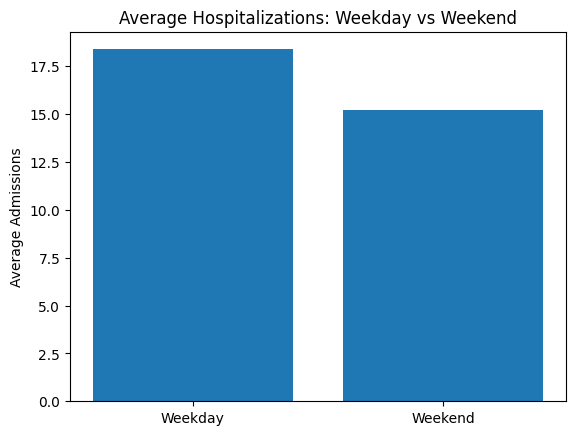

In [30]:
weekend_vs_weekday = df_weather_hospital_adm_air_qual.groupby('IsWeekend')['NUMBER_INT'].mean()
plt.bar(['Weekday', 'Weekend'], weekend_vs_weekday)
plt.title('Average Hospitalizations: Weekday vs Weekend')
plt.ylabel('Average Admissions')
plt.show()

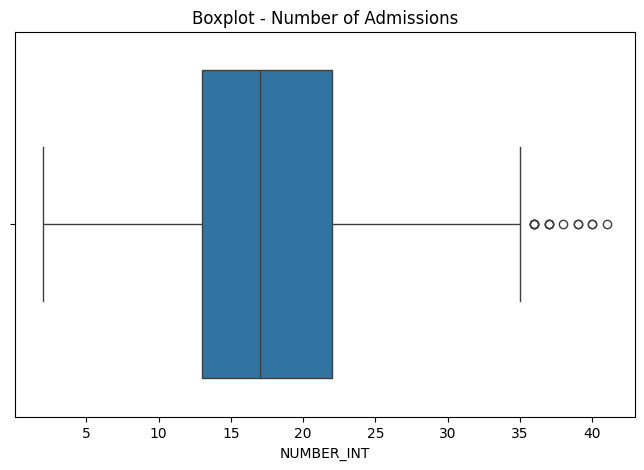

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_weather_hospital_adm_air_qual['NUMBER_INT'])
plt.title('Boxplot - Number of Admissions')
plt.show()

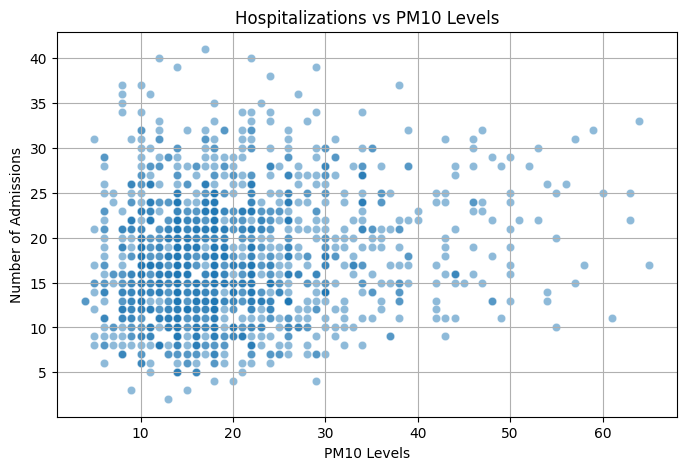

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MP10', y='NUMBER_INT', data=df_weather_hospital_adm_air_qual, alpha=0.5)
plt.title('Hospitalizations vs PM10 Levels')
plt.xlabel('PM10 Levels')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()

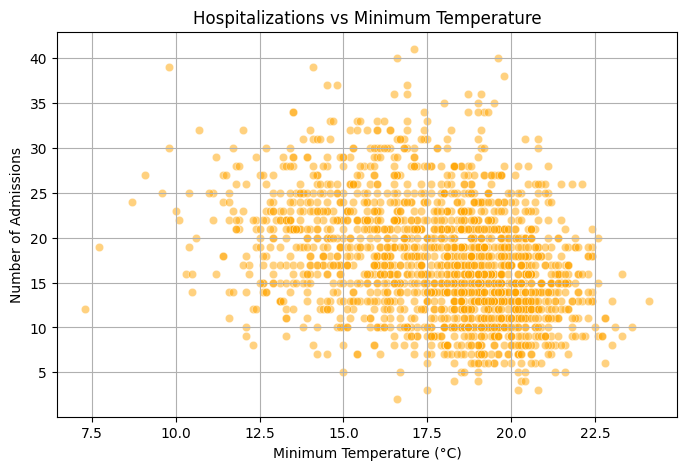

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp_min', y='NUMBER_INT', data=df_weather_hospital_adm_air_qual, alpha=0.5, color='orange')
plt.title('Hospitalizations vs Minimum Temperature')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()

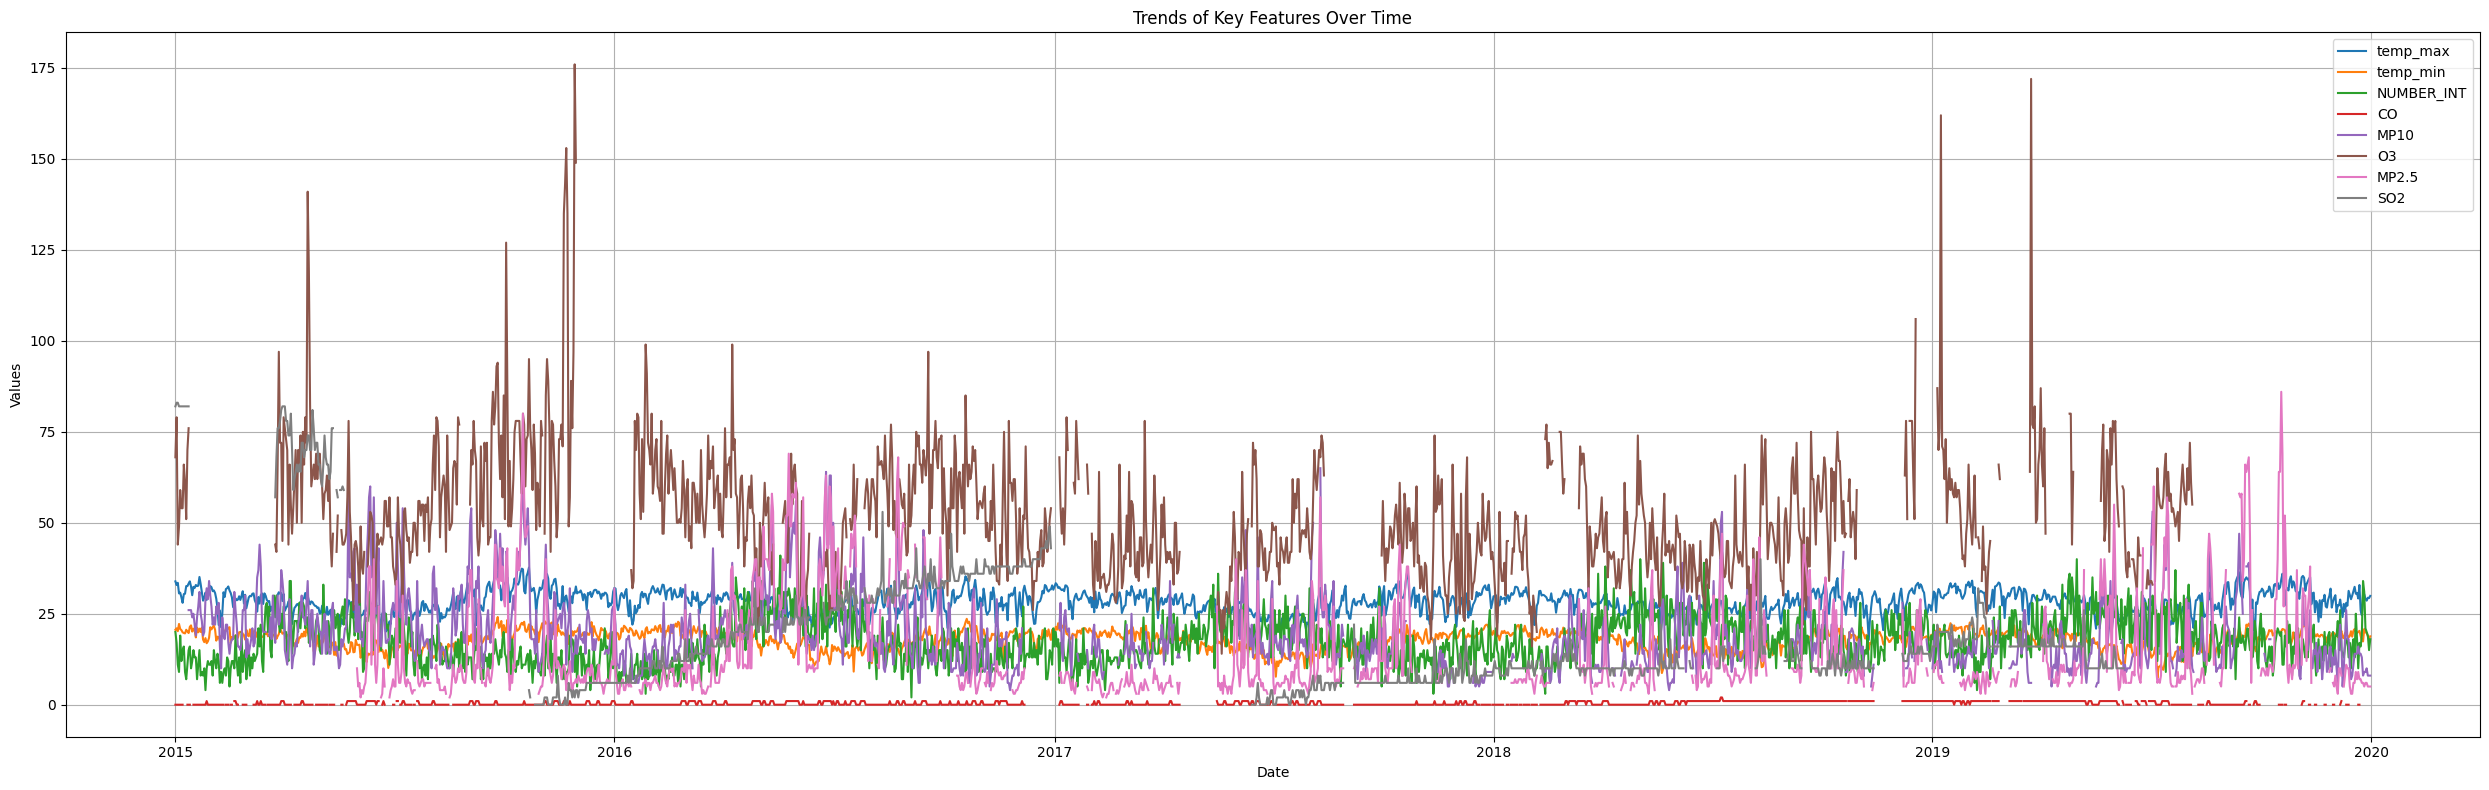

In [34]:

plt.figure(figsize=(25, 8))

df_weather_hospital_adm_air_qual_copy = df_weather_hospital_adm_air_qual.copy()

df_weather_hospital_adm_air_qual_copy['Date'] = pd.to_datetime(df_weather_hospital_adm_air_qual_copy['Date'], format='%Y%m%d')

features_plot = [
    'temp_max', 'temp_min', 'NUMBER_INT',
    'CO', 'MP10', 'O3', 'MP2.5', 'SO2'
]



for feature in features_plot:
    plt.plot(df_weather_hospital_adm_air_qual_copy['Date'], 
             df_weather_hospital_adm_air_qual_copy[feature], 
             label=feature)

plt.title('Trends of Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

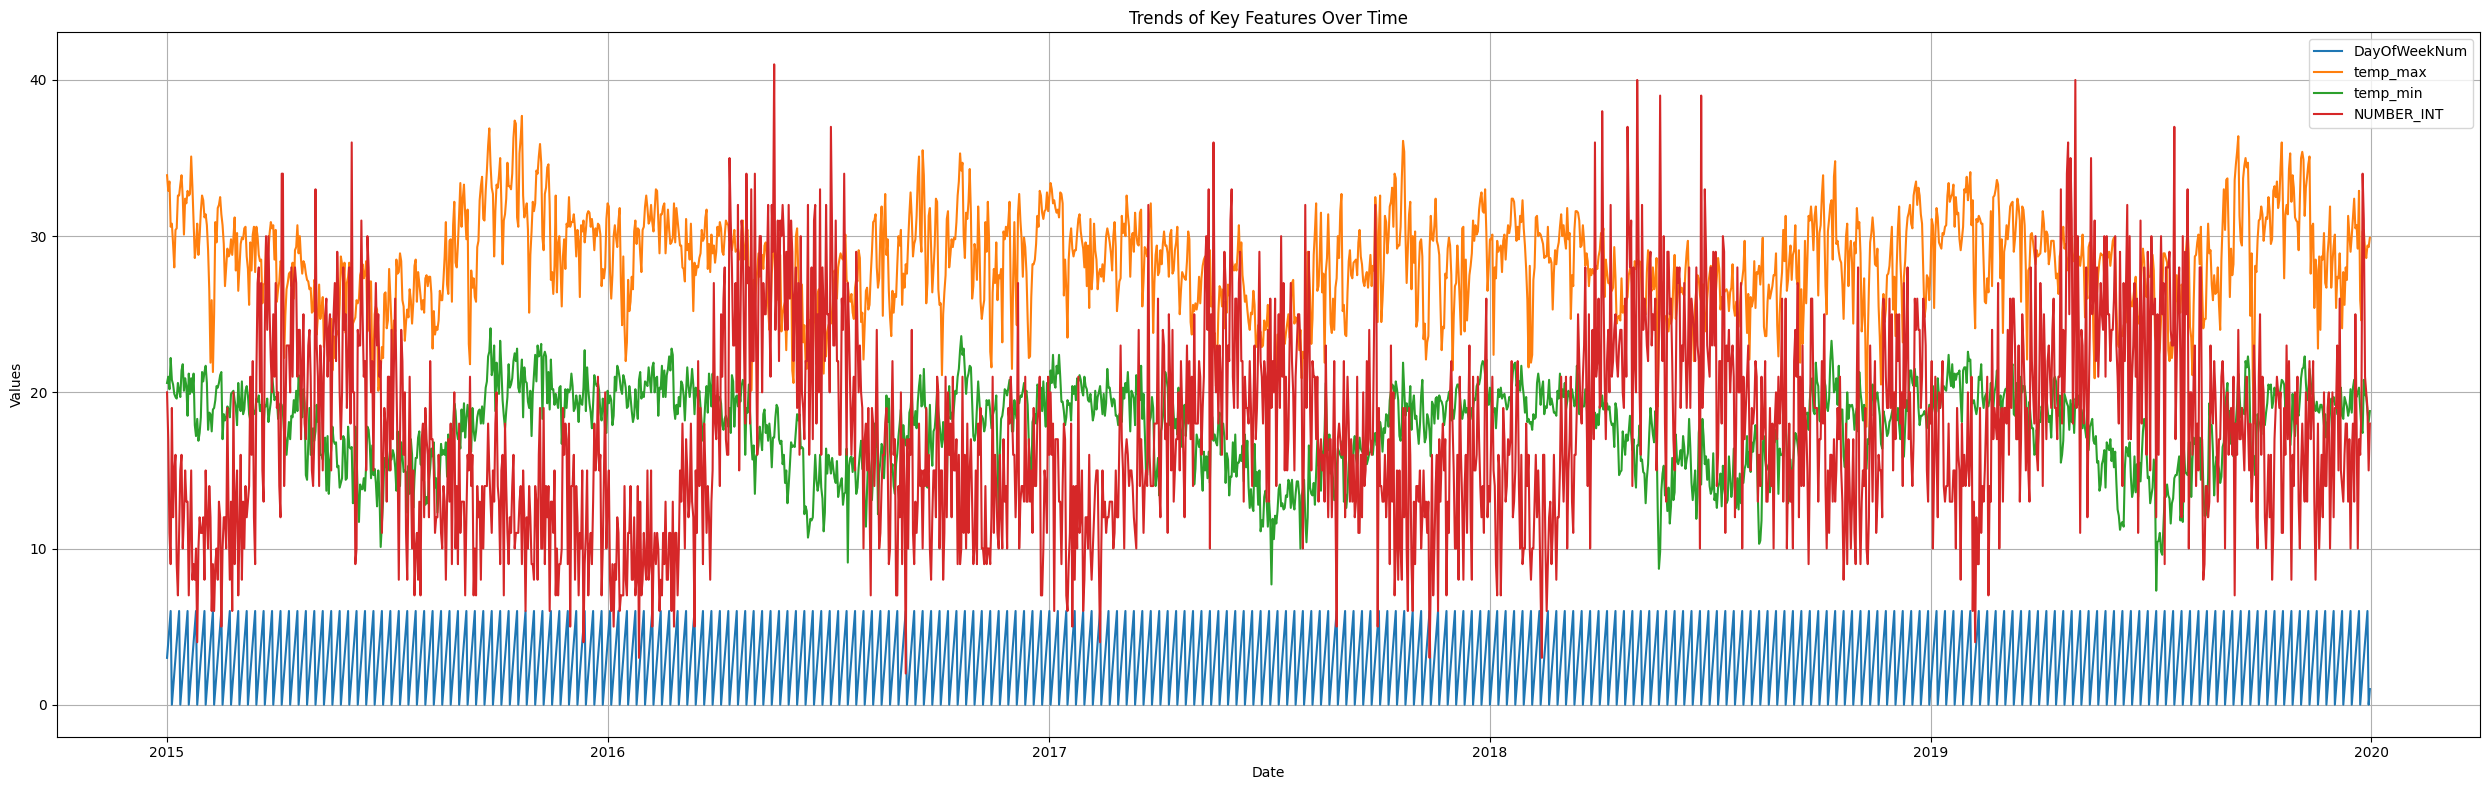

In [35]:
plt.figure(figsize=(25, 8))

features_plot_with_day = [
    'DayOfWeekNum',
    'temp_max', 
    'temp_min', 
    'NUMBER_INT'
]



for feature in features_plot_with_day:
    plt.plot(df_weather_hospital_adm_air_qual_copy['Date'], 
             df_weather_hospital_adm_air_qual_copy[feature], 
             label=feature)

plt.title('Trends of Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

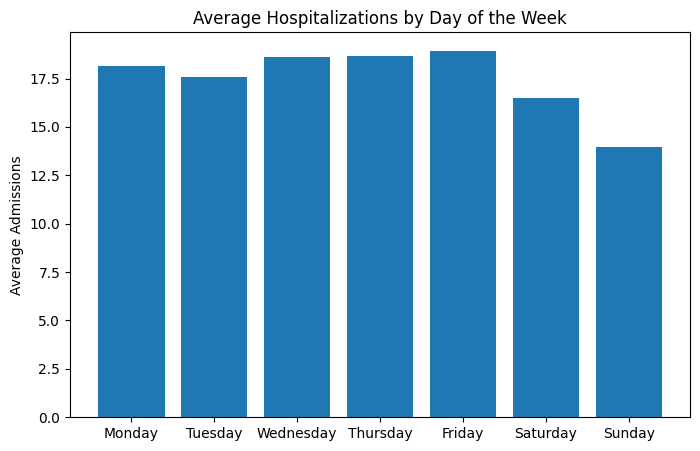

In [36]:
weekdays_avg = df_weather_hospital_adm_air_qual.groupby('DayOfWeekNum')['NUMBER_INT'].mean()

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 5))
plt.bar(day_labels, weekdays_avg)
plt.title('Average Hospitalizations by Day of the Week')
plt.ylabel('Average Admissions')
plt.show()